In [80]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from tpot import TPOTClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib # Added joblib for saving the model later

warnings.filterwarnings("ignore")

In [81]:
data = pd.read_csv(file_path)
print(f"Data loaded successfully from: {file_path}")
print("\nFirst 5 rows of the dataset:")
print(data.head())
print("\nDataset Info:")
data.info()


Data loaded successfully from: ../transfusion.csv

First 5 rows of the dataset:
   Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)  \
0                 2                 50                  12500             98   
1                 0                 13                   3250             28   
2                 1                 16                   4000             35   
3                 2                 20                   5000             45   
4                 1                 24                   6000             77   

   whether he/she donated blood in March 2007  
0                                           1  
1                                           1  
2                                           1  
3                                           1  
4                                           0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                     

In [82]:
X = data.drop(columns=["whether he/she donated blood in March 2007"])
y = data["whether he/she donated blood in March 2007"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
# Order 2: Select features and target & Split into train and test sets
X = data.drop(columns=["whether he/she donated blood in March 2007"])
y = data["whether he/she donated blood in March 2007"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nData split into training and test sets.")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


Data split into training and test sets.
X_train shape: (598, 4), y_train shape: (598,)
X_test shape: (150, 4), y_test shape: (150,)


In [84]:
# Order 3: Train a logistic regression model with class_weight balanced
print("\n--- Training Logistic Regression Model ---")
model = LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced')
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate Logistic Regression Model Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Test set accuracy: {accuracy:.2f}")


--- Training Logistic Regression Model ---
Logistic Regression Test set accuracy: 0.66


In [85]:
# Confusion matrix for LR
cm_lr = confusion_matrix(y_test, y_pred)
print("\nLogistic Regression Confusion Matrix:")
print(cm_lr)
# Classification report for LR
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred))  # This was duplicated in your last chunk, keeping one.


Logistic Regression Confusion Matrix:
[[72 41]
 [10 27]]

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.64      0.74       113
           1       0.40      0.73      0.51        37

    accuracy                           0.66       150
   macro avg       0.64      0.68      0.63       150
weighted avg       0.76      0.66      0.68       150



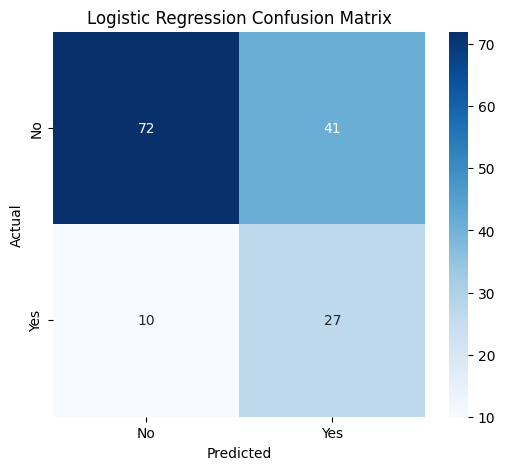

In [86]:
# Visualize LR Confusion Matrix (from your snippet)
plt.figure(figsize=(6,5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [87]:
# Feature Coefficients and Visualization for LR (from your snippet)
feature_names = X.columns
coefficients = model.coef_[0]
print("\nLogistic Regression Coefficients:")
for name, coef in zip(feature_names, coefficients):
    print(f"{name}: {coef:.4f}")


Logistic Regression Coefficients:
Recency (months): -0.0894
Frequency (times): 0.0000
Monetary (c.c. blood): 0.0006
Time (months): -0.0238


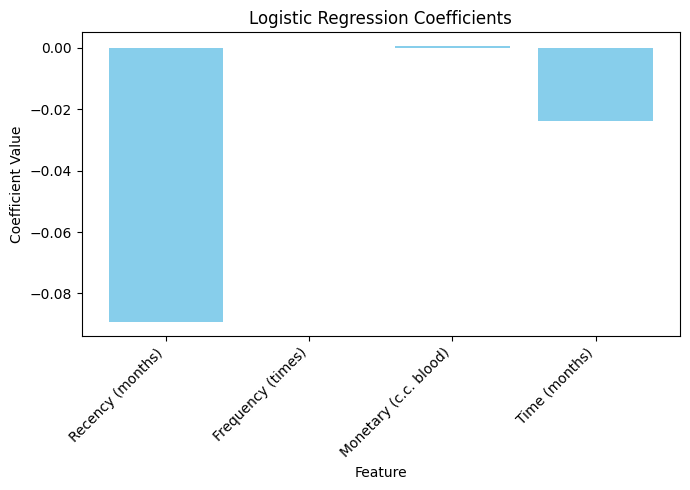

In [88]:
plt.figure(figsize=(7,5))
plt.bar(feature_names, coefficients, color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.title('Logistic Regression Coefficients')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [89]:
# Train and Evaluate TPOT Classifier (from your snippet)
print("\n--- Training TPOT Classifier (This may take some time) ---")
tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2, random_state=42, scoring='f1_weighted', cv=5)
# Added scoring='f1_weighted' and cv=5 for better handling of imbalanced data
# Verbosity=2 will show progress during training
tpot.fit(X_train, y_train)

print(f"\nTPOT test accuracy: {tpot.score(X_test, y_test):.2f}")


--- Training TPOT Classifier (This may take some time) ---
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier


Version 0.12.2 of tpot is outdated. Version 1.0.0 was released Wednesday February 26, 2025.


                                                                             
Generation 1 - Current best internal CV score: 0.7900773696293543
                                                                             
Generation 2 - Current best internal CV score: 0.7900773696293543
                                                                             
Generation 3 - Current best internal CV score: 0.7900773696293543
                                                                              
Generation 4 - Current best internal CV score: 0.7900773696293543
                                                                              
Generation 5 - Current best internal CV score: 0.7900773696293543
                                                                              
Best pipeline: MLPClassifier(RobustScaler(input_matrix), alpha=0.0001, learning_rate_init=0.01)

TPOT test accuracy: 0.70


In [90]:
# Evaluate TPOT's best model (from your snippet)
y_pred_tpot = tpot.predict(X_test)

In [91]:
    print("\nTPOT Confusion Matrix:")
    cm_tpot = confusion_matrix(y_test, y_pred_tpot)
    print(cm_tpot)



TPOT Confusion Matrix:
[[105   8]
 [ 30   7]]


In [92]:
print("\nTPOT Classification Report:")
print(classification_report(y_test, y_pred_tpot))


TPOT Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       113
           1       0.47      0.19      0.27        37

    accuracy                           0.75       150
   macro avg       0.62      0.56      0.56       150
weighted avg       0.70      0.75      0.70       150



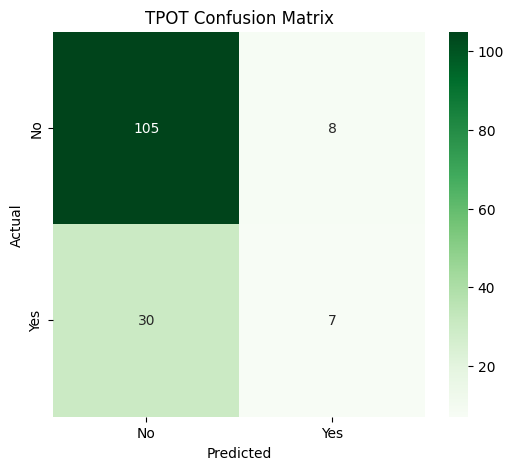

In [93]:
# Visualize TPOT Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm_tpot, annot=True, fmt='d', cmap='Greens', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('TPOT Confusion Matrix')
plt.show()

In [94]:
# Print TPOT's best pipeline
print("\nBest pipeline found by TPOT:")
print(tpot.fitted_pipeline_)


Best pipeline found by TPOT:
Pipeline(steps=[('robustscaler', RobustScaler()),
                ('mlpclassifier',
                 MLPClassifier(learning_rate_init=0.01, random_state=42))])


In [95]:
# Save the Logistic Regression model (from your snippet)
# Consider saving TPOT's best pipeline too if it performs better
joblib.dump(model, 'logistic_regression_model.pkl')
print("\nLogistic Regression model saved as 'logistic_regression_model.pkl'")


Logistic Regression model saved as 'logistic_regression_model.pkl'


In [96]:
# tpot.export('tpot_best_pipeline.py')
# print("TPOT best pipeline exported as 'tpot_best_pipeline.py'")

In [97]:
loaded_model = joblib.load('logistic_regression_model.pkl')
print("Model loaded successfully!")

Model loaded successfully!


In [98]:
# Example of new data (ensure the order of features matches training order)
# Assuming features are: 'Recency', 'Frequency', 'Monetary', 'Time'
# Example: a donor who donated 3 months ago, 10 times, 2500 c.c., and first donation was 60 months ago
new_donor_data = pd.DataFrame([[3, 10, 2500, 60]], columns=X.columns)  # Use X.columns to ensure correct feature names

In [99]:
# Make a prediction
prediction = loaded_model.predict(new_donor_data)
prediction_proba = loaded_model.predict_proba(new_donor_data)  # Get probabilities

print(f"\nPrediction for new donor (0=No, 1=Yes): {prediction[0]}")
print(f"Probability of not donating (0): {prediction_proba[0][0]:.4f}")
print(f"Probability of donating (1): {prediction_proba[0][1]:.4f}")


Prediction for new donor (0=No, 1=Yes): 1
Probability of not donating (0): 0.4136
Probability of donating (1): 0.5864
